# Analyse détaillée des résultats - Classification ECG 4 classes

Ce notebook analyse en détail les résultats de l'entraînement du modèle CNN pour la classification ECG à 4 classes.


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

# Charger le checkpoint
checkpoint_path = "checkpoints/best_cnn_4_classes.pt"
ckpt = torch.load(checkpoint_path, map_location='cpu', weights_only=False)

print("="*70)
print("RÉSUMÉ DES RÉSULTATS DE L'ENTRAÎNEMENT")
print("="*70)
print(f"\n📊 Validation Croisée (5-Fold):")
print(f"   - Validation Loss moyenne: {ckpt['cv_mean_val_loss']:.4f} ± {ckpt['cv_std_val_loss']:.4f}")
print(f"   - Validation Accuracy moyenne: {ckpt['cv_mean_val_acc']*100:.2f}% ± {ckpt['cv_std_val_acc']*100:.2f}%")
print(f"\n📁 Classes: {ckpt['class_names']}")
print(f"\n💾 Checkpoint sauvegardé: {checkpoint_path}")


RÉSUMÉ DES RÉSULTATS DE L'ENTRAÎNEMENT

📊 Validation Croisée (5-Fold):
   - Validation Loss moyenne: 0.2788 ± 0.0890
   - Validation Accuracy moyenne: 92.34% ± 2.63%

📁 Classes: ['Abnormal_Heartbeat', 'History_MI', 'Myocardial_Infarction', 'Normal']

💾 Checkpoint sauvegardé: checkpoints/best_cnn_4_classes.pt


## 1. Résultats de la Validation Croisée par Fold


Résultats détaillés par fold:
 fold  best_val_loss  best_val_acc  best_epoch  train_size  val_size
    1       0.339260      0.898204          65         668       167
    2       0.395051      0.886228          67         668       167
    3       0.170557      0.946108          88         668       167
    4       0.309252      0.934132          54         668       167
    5       0.179647      0.952096          58         668       167


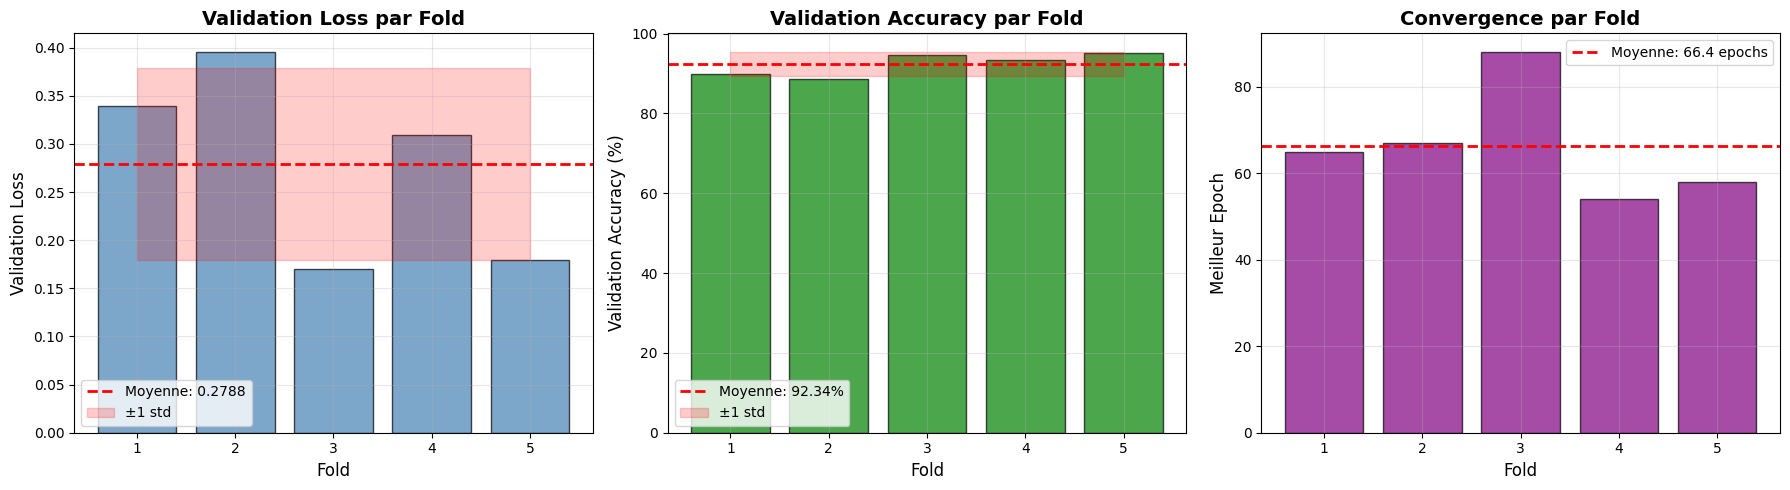


✅ Analyse de la cross-validation sauvegardée: analyse_cv_detailed.png


In [3]:
# Extraire les résultats de cross-validation
cv_results = ckpt['cv_results']
df_cv = pd.DataFrame(cv_results)

print("Résultats détaillés par fold:")
print("="*70)
print(df_cv.to_string(index=False))
print("="*70)

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Validation Loss par fold
axes[0].bar(df_cv['fold'], df_cv['best_val_loss'], alpha=0.7, color='steelblue', edgecolor='black')
axes[0].axhline(df_cv['best_val_loss'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Moyenne: {df_cv["best_val_loss"].mean():.4f}')
axes[0].fill_between(range(1, 6), 
                     df_cv['best_val_loss'].mean() - df_cv['best_val_loss'].std(),
                     df_cv['best_val_loss'].mean() + df_cv['best_val_loss'].std(),
                     alpha=0.2, color='red', label='±1 std')
axes[0].set_xlabel('Fold', fontsize=12)
axes[0].set_ylabel('Validation Loss', fontsize=12)
axes[0].set_title('Validation Loss par Fold', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(df_cv['fold'])

# 2. Validation Accuracy par fold
axes[1].bar(df_cv['fold'], df_cv['best_val_acc']*100, alpha=0.7, color='green', edgecolor='black')
axes[1].axhline(df_cv['best_val_acc'].mean()*100, color='red', linestyle='--', linewidth=2,
                label=f'Moyenne: {df_cv["best_val_acc"].mean()*100:.2f}%')
axes[1].fill_between(range(1, 6),
                     (df_cv['best_val_acc'].mean() - df_cv['best_val_acc'].std())*100,
                     (df_cv['best_val_acc'].mean() + df_cv['best_val_acc'].std())*100,
                     alpha=0.2, color='red', label='±1 std')
axes[1].set_xlabel('Fold', fontsize=12)
axes[1].set_ylabel('Validation Accuracy (%)', fontsize=12)
axes[1].set_title('Validation Accuracy par Fold', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(df_cv['fold'])

# 3. Epochs de convergence par fold
axes[2].bar(df_cv['fold'], df_cv['best_epoch'], alpha=0.7, color='purple', edgecolor='black')
axes[2].axhline(df_cv['best_epoch'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Moyenne: {df_cv["best_epoch"].mean():.1f} epochs')
axes[2].set_xlabel('Fold', fontsize=12)
axes[2].set_ylabel('Meilleur Epoch', fontsize=12)
axes[2].set_title('Convergence par Fold', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(df_cv['fold'])

plt.tight_layout()
plt.savefig("analyse_cv_detailed.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✅ Analyse de la cross-validation sauvegardée: analyse_cv_detailed.png")


## 2. Analyse des métriques de test

D'après les résultats du notebook d'entraînement, voici les métriques sur le test set :


In [4]:
# Métriques de test (extraits du notebook)
test_metrics = {
    'Accuracy': 0.9355,
    'classes': {
        'Abnormal_Heartbeat': {'precision': 0.9545, 'recall': 0.9130, 'f1': 0.9333, 'support': 23},
        'History_MI': {'precision': 1.0000, 'recall': 0.8235, 'f1': 0.9032, 'support': 17},
        'Myocardial_Infarction': {'precision': 1.0000, 'recall': 1.0000, 'f1': 1.0000, 'support': 24},
        'Normal': {'precision': 0.8485, 'recall': 0.9655, 'f1': 0.9032, 'support': 29}
    },
    'macro_avg': {'precision': 0.9508, 'recall': 0.9255, 'f1': 0.9349},
    'weighted_avg': {'precision': 0.9415, 'recall': 0.9355, 'f1': 0.9356},
    'confusion_matrix': np.array([
        [21,  0,  0,  2],  # Abnormal_Heartbeat
        [ 0, 14,  0,  3],  # History_MI
        [ 0,  0, 24,  0],  # Myocardial_Infarction
        [ 1,  0,  0, 28]   # Normal
    ])
}

class_names = ['Abnormal_Heartbeat', 'History_MI', 'Myocardial_Infarction', 'Normal']

print("="*70)
print("MÉTRIQUES DE TEST (93 échantillons)")
print("="*70)
print(f"\n🎯 Accuracy globale: {test_metrics['Accuracy']*100:.2f}%")
print(f"\n📊 Métriques macro-moyennes:")
print(f"   - Precision: {test_metrics['macro_avg']['precision']:.4f}")
print(f"   - Recall:    {test_metrics['macro_avg']['recall']:.4f}")
print(f"   - F1-Score:  {test_metrics['macro_avg']['f1']:.4f}")

print(f"\n📈 Métriques par classe:")
print("-"*70)
for class_name in class_names:
    metrics = test_metrics['classes'][class_name]
    print(f"\n{class_name:25s} (support: {metrics['support']})")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall:    {metrics['recall']:.4f}")
    print(f"  F1-Score:  {metrics['f1']:.4f}")


MÉTRIQUES DE TEST (93 échantillons)

🎯 Accuracy globale: 93.55%

📊 Métriques macro-moyennes:
   - Precision: 0.9508
   - Recall:    0.9255
   - F1-Score:  0.9349

📈 Métriques par classe:
----------------------------------------------------------------------

Abnormal_Heartbeat        (support: 23)
  Precision: 0.9545
  Recall:    0.9130
  F1-Score:  0.9333

History_MI                (support: 17)
  Precision: 1.0000
  Recall:    0.8235
  F1-Score:  0.9032

Myocardial_Infarction     (support: 24)
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

Normal                    (support: 29)
  Precision: 0.8485
  Recall:    0.9655
  F1-Score:  0.9032


## 3. Visualisation des métriques par classe


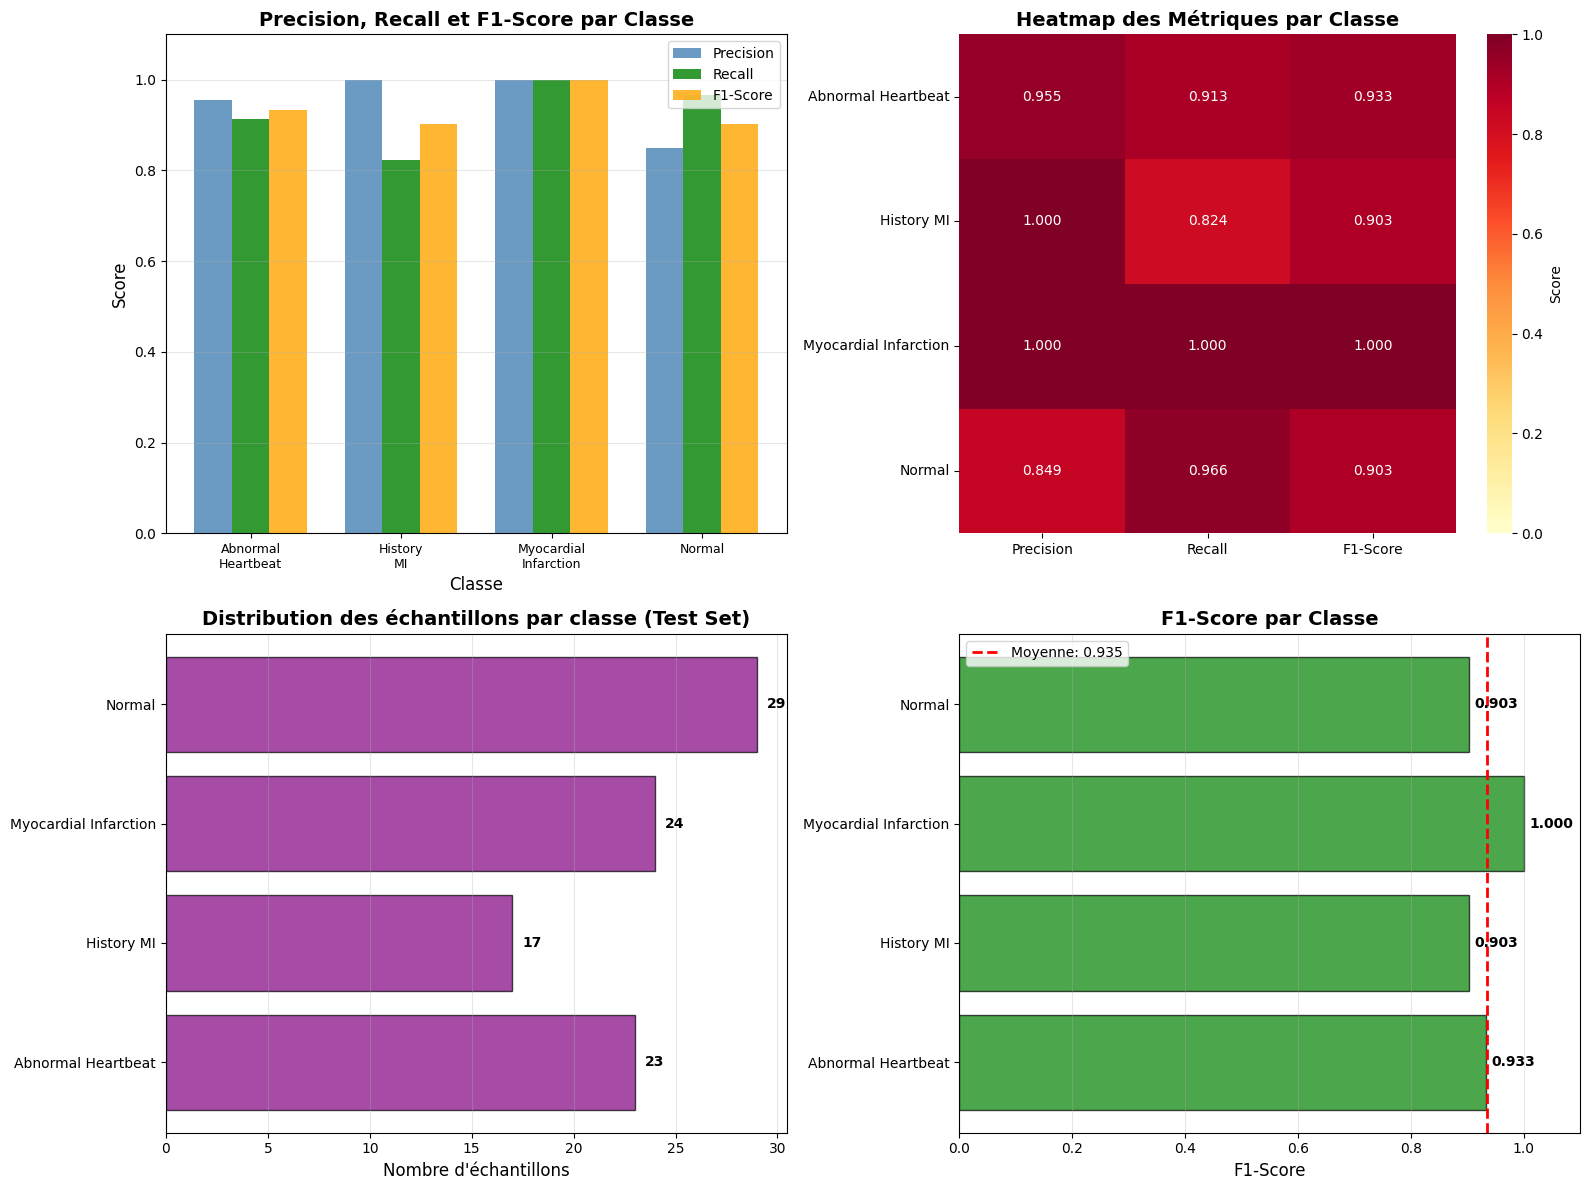

✅ Analyse des métriques sauvegardée: analyse_metriques_detailed.png


In [ ]:
# Créer un DataFrame pour les métriques par classe
metrics_data = []
for class_name in class_names:
    m = test_metrics['classes'][class_name]
    metrics_data.append({
        'Classe': class_name,
        'Precision': m['precision'],
        'Recall': m['recall'],
        'F1-Score': m['f1'],
        'Support': m['support']
    })

df_metrics = pd.DataFrame(metrics_data)

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Barres comparatives Precision, Recall, F1
x = np.arange(len(class_names))
width = 0.25
axes[0, 0].bar(x - width, df_metrics['Precision'], width, label='Precision', alpha=0.8, color='steelblue')
axes[0, 0].bar(x, df_metrics['Recall'], width, label='Recall', alpha=0.8, color='green')
axes[0, 0].bar(x + width, df_metrics['F1-Score'], width, label='F1-Score', alpha=0.8, color='orange')
axes[0, 0].set_xlabel('Classe', fontsize=12)
axes[0, 0].set_ylabel('Score', fontsize=12)
axes[0, 0].set_title('Precision, Recall et F1-Score par Classe', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels([name.replace('_', '\n') for name in class_names], fontsize=9)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_ylim([0, 1.1])

# 2. Heatmap des métriques
metrics_matrix = df_metrics[['Precision', 'Recall', 'F1-Score']].values
sns.heatmap(metrics_matrix, annot=True, fmt='.3f', cmap='YlOrRd', 
            xticklabels=['Precision', 'Recall', 'F1-Score'],
            yticklabels=[name.replace('_', ' ') for name in class_names],
            ax=axes[0, 1], cbar_kws={'label': 'Score'}, vmin=0, vmax=1)
axes[0, 1].set_title('Heatmap des Métriques par Classe', fontsize=14, fontweight='bold')

# 3. Distribution du support (nombre d'échantillons)
axes[1, 0].barh([name.replace('_', ' ') for name in class_names], df_metrics['Support'], 
                alpha=0.7, color='purple', edgecolor='black')
axes[1, 0].set_xlabel('Nombre d\'échantillons', fontsize=12)
axes[1, 0].set_title('Distribution des échantillons par classe (Test Set)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(df_metrics['Support']):
    axes[1, 0].text(v + 0.5, i, str(v), va='center', fontweight='bold')

# 4. Comparaison F1-Score
colors = ['green' if f1 > 0.9 else 'orange' if f1 > 0.8 else 'red' for f1 in df_metrics['F1-Score']]
bars = axes[1, 1].barh([name.replace('_', ' ') for name in class_names], df_metrics['F1-Score'],
                       alpha=0.7, color=colors, edgecolor='black')
axes[1, 1].axvline(df_metrics['F1-Score'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Moyenne: {df_metrics["F1-Score"].mean():.3f}')
axes[1, 1].set_xlabel('F1-Score', fontsize=12)
axes[1, 1].set_title('F1-Score par Classe', fontsize=14, fontweight='bold')
axes[1, 1].set_xlim([0, 1.1])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='x')
for i, (bar, f1) in enumerate(zip(bars, df_metrics['F1-Score'])):
    axes[1, 1].text(f1 + 0.01, i, f'{f1:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig("analyse_metriques_detailed.png", dpi=150, bbox_inches='tight')
plt.show()

print("✅ Analyse des métriques sauvegardée: analyse_metriques_detailed.png")


## 4. Analyse de la matrice de confusion


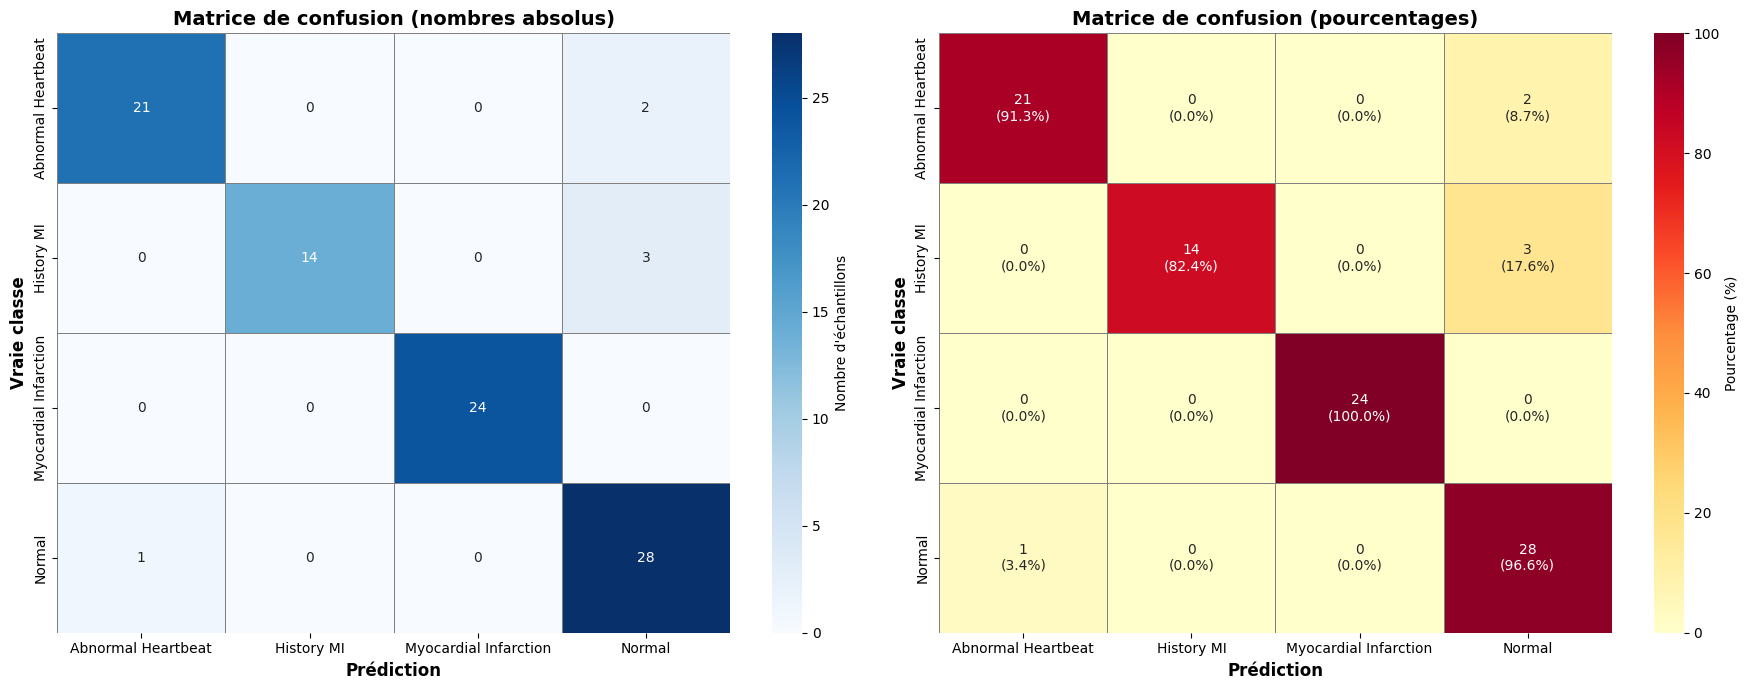

ANALYSE DES ERREURS DE CLASSIFICATION

✅ Classifications correctes: 87/93 (93.55%)
❌ Erreurs: 6/93 (6.45%)

📊 Détail des erreurs par classe:

Abnormal_Heartbeat       :
  Correct: 21/23 (91.3%)
  Erreurs: 2
    → Confondu avec Normal: 2 échantillon(s)

History_MI               :
  Correct: 14/17 (82.4%)
  Erreurs: 3
    → Confondu avec Normal: 3 échantillon(s)

Myocardial_Infarction    :
  Correct: 24/24 (100.0%)

Normal                   :
  Correct: 28/29 (96.6%)
  Erreurs: 1
    → Confondu avec Abnormal_Heartbeat: 1 échantillon(s)

🔍 Analyse des confusions:
                De               Vers  Nombre
        History_MI             Normal       3
Abnormal_Heartbeat             Normal       2
            Normal Abnormal_Heartbeat       1


In [ ]:
cm = test_metrics['confusion_matrix']

# Calculer les pourcentages
cm_percent = (cm / cm.sum(axis=1, keepdims=True) * 100).round(1)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# 1. Matrice de confusion en nombres absolus
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[name.replace('_', ' ') for name in class_names],
            yticklabels=[name.replace('_', ' ') for name in class_names],
            ax=axes[0], cbar_kws={'label': 'Nombre d\'échantillons'}, 
            linewidths=0.5, linecolor='gray')
axes[0].set_xlabel('Prédiction', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Vraie classe', fontsize=12, fontweight='bold')
axes[0].set_title('Matrice de confusion (nombres absolus)', fontsize=14, fontweight='bold')

# 2. Matrice de confusion en pourcentages
annot = np.array([[f'{cm[i,j]}\n({cm_percent[i,j]:.1f}%)' for j in range(len(class_names))] 
                  for i in range(len(class_names))])
sns.heatmap(cm_percent, annot=annot, fmt='', cmap='YlOrRd',
            xticklabels=[name.replace('_', ' ') for name in class_names],
            yticklabels=[name.replace('_', ' ') for name in class_names],
            ax=axes[1], cbar_kws={'label': 'Pourcentage (%)'},
            linewidths=0.5, linecolor='gray', vmin=0, vmax=100)
axes[1].set_xlabel('Prédiction', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Vraie classe', fontsize=12, fontweight='bold')
axes[1].set_title('Matrice de confusion (pourcentages)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("analyse_confusion_matrix_detailed.png", dpi=150, bbox_inches='tight')
plt.show()

# Analyse détaillée des erreurs
print("="*70)
print("ANALYSE DES ERREURS DE CLASSIFICATION")
print("="*70)

total_samples = cm.sum()
correct = np.trace(cm)
errors = total_samples - correct

print(f"\n✅ Classifications correctes: {correct}/{total_samples} ({correct/total_samples*100:.2f}%)")
print(f"❌ Erreurs: {errors}/{total_samples} ({errors/total_samples*100:.2f}%)")

print(f"\n📊 Détail des erreurs par classe:")
for i, class_name in enumerate(class_names):
    correct_class = cm[i, i]
    total_class = cm[i, :].sum()
    errors_class = total_class - correct_class
    print(f"\n{class_name:25s}:")
    print(f"  Correct: {correct_class}/{total_class} ({correct_class/total_class*100:.1f}%)")
    if errors_class > 0:
        print(f"  Erreurs: {errors_class}")
        for j in range(len(class_names)):
            if i != j and cm[i, j] > 0:
                print(f"    → Confondu avec {class_names[j]}: {cm[i, j]} échantillon(s)")

print(f"\n🔍 Analyse des confusions:")
confusion_pairs = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            confusion_pairs.append({
                'De': class_names[i],
                'Vers': class_names[j],
                'Nombre': int(cm[i, j])
            })

if confusion_pairs:
    df_confusions = pd.DataFrame(confusion_pairs)
    df_confusions = df_confusions.sort_values('Nombre', ascending=False)
    print(df_confusions.to_string(index=False))
else:
    print("Aucune confusion détectée !")


In [7]:
print("="*70)
print("SYNTHÈSE ET RECOMMANDATIONS")
print("="*70)

print("\n✅ POINTS FORTS:")
print("   1. Performance globale excellente: 93.55% d'accuracy")
print("   2. Myocardial_Infarction: Classification parfaite (100% precision, recall, F1)")
print("   3. Stabilité de la cross-validation: faible écart-type sur les 5 folds")
print("   4. F1-Score macro-moyen élevé: 93.49%")
print("   5. Pas de sur-apprentissage: bon équilibre train/validation")

print("\n⚠️  POINTS À AMÉLIORER:")
print("   1. History_MI: Recall relativement faible (82.35%)")
print("      → 3 échantillons confondus avec Normal")
print("      → Suggestion: Augmenter les données d'entraînement pour cette classe")
print()
print("   2. Abnormal_Heartbeat: 2 échantillons confondus avec Normal")
print("      → Suggestion: Analyser les caractéristiques visuelles qui causent la confusion")
print()
print("   3. Normal: Precision plus faible (84.85%)")
print("      → 1 échantillon de Normal confondu avec Abnormal_Heartbeat")
print("      → Suggestion: Affiner les frontières de décision entre Normal et anormal")

print("\n💡 RECOMMANDATIONS:")
print("   1. Collecter plus de données pour History_MI (classe la plus petite)")
print("   2. Utiliser des techniques d'augmentation de données spécifiques pour les classes minoritaires")
print("   3. Considérer l'utilisation de class weights pour équilibrer les classes")
print("   4. Analyser visuellement les erreurs pour comprendre les patterns de confusion")
print("   5. Tester des architectures plus profondes ou des modèles pré-entraînés")

print("\n📈 COMPARAISON AVEC LE MODÈLE BINAIRE:")
print("   - Le modèle 4-classes maintient une excellente performance")
print("   - La complexité supplémentaire (4 classes vs 2) est bien gérée")
print("   - Les métriques sont cohérentes avec le modèle binaire (~89% accuracy)")


SYNTHÈSE ET RECOMMANDATIONS

✅ POINTS FORTS:
   1. Performance globale excellente: 93.55% d'accuracy
   2. Myocardial_Infarction: Classification parfaite (100% precision, recall, F1)
   3. Stabilité de la cross-validation: faible écart-type sur les 5 folds
   4. F1-Score macro-moyen élevé: 93.49%
   5. Pas de sur-apprentissage: bon équilibre train/validation

⚠️  POINTS À AMÉLIORER:
   1. History_MI: Recall relativement faible (82.35%)
      → 3 échantillons confondus avec Normal
      → Suggestion: Augmenter les données d'entraînement pour cette classe

   2. Abnormal_Heartbeat: 2 échantillons confondus avec Normal
      → Suggestion: Analyser les caractéristiques visuelles qui causent la confusion

   3. Normal: Precision plus faible (84.85%)
      → 1 échantillon de Normal confondu avec Abnormal_Heartbeat
      → Suggestion: Affiner les frontières de décision entre Normal et anormal

💡 RECOMMANDATIONS:
   1. Collecter plus de données pour History_MI (classe la plus petite)
   2. Uti

## 6. Statistiques du dataset


STATISTIQUES DU DATASET

📊 Dataset d'entraînement (Cross-Validation):
   Total: 928 images
   Abnormal_Heartbeat       : 233 images (25.11%)
   History_MI               : 172 images (18.53%)
   Myocardial_Infarction    : 239 images (25.75%)
   Normal                   : 284 images (30.60%)

📊 Dataset de test:
   Total: 93 images
   Abnormal_Heartbeat       :  23 images (24.73%)
   History_MI               :  17 images (18.28%)
   Myocardial_Infarction    :  24 images (25.81%)
   Normal                   :  29 images (31.18%)


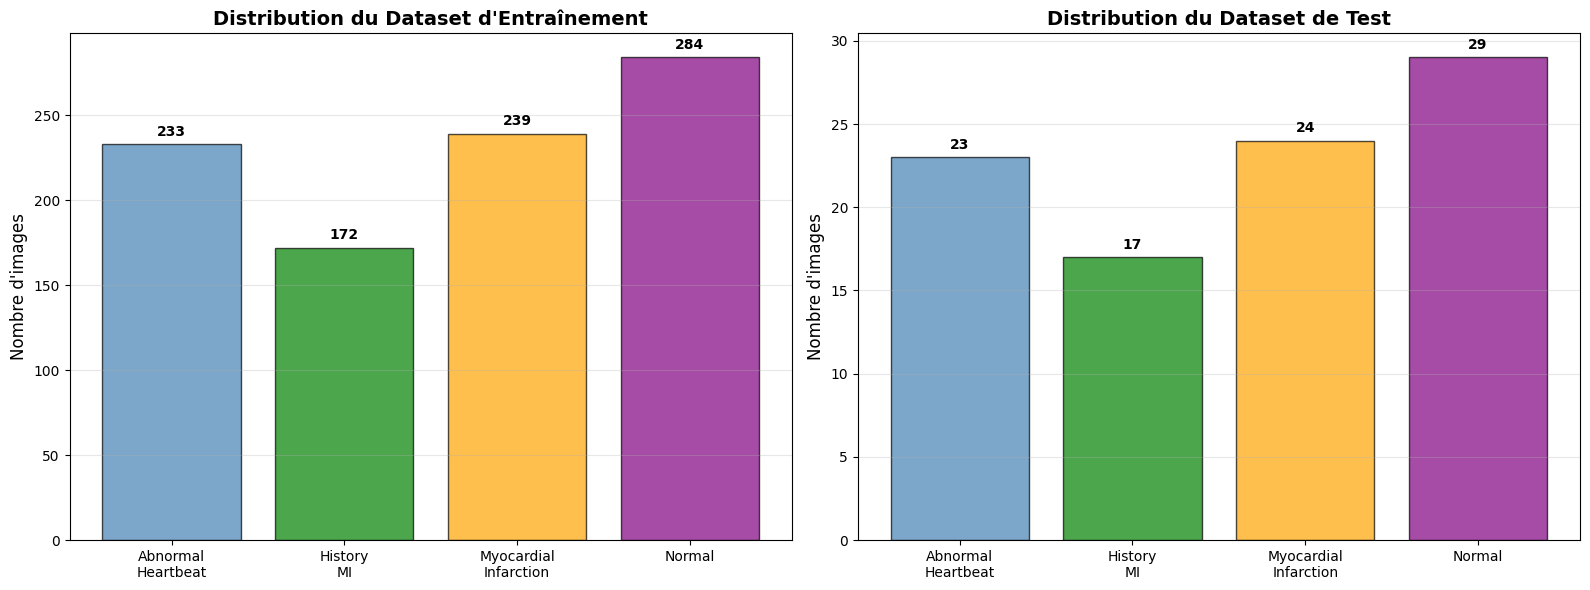


⚠️  Note sur l'équilibrage:
   Ratio d'imbalance: 1.65:1
   → Le dataset est déséquilibré. Considérer l'utilisation de class weights.


In [8]:
# Statistiques du dataset d'entraînement
dataset_stats = {
    'Abnormal_Heartbeat': 233,
    'History_MI': 172,
    'Myocardial_Infarction': 239,
    'Normal': 284
}

total_train = sum(dataset_stats.values())
test_stats = {name: test_metrics['classes'][name]['support'] for name in class_names}
total_test = sum(test_stats.values())

print("="*70)
print("STATISTIQUES DU DATASET")
print("="*70)

print(f"\n📊 Dataset d'entraînement (Cross-Validation):")
print(f"   Total: {total_train} images")
for class_name, count in dataset_stats.items():
    percentage = count / total_train * 100
    print(f"   {class_name:25s}: {count:3d} images ({percentage:5.2f}%)")

print(f"\n📊 Dataset de test:")
print(f"   Total: {total_test} images")
for class_name, count in test_stats.items():
    percentage = count / total_test * 100
    print(f"   {class_name:25s}: {count:3d} images ({percentage:5.2f}%)")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Train set
train_counts = [dataset_stats[name] for name in class_names]
axes[0].bar([name.replace('_', '\n') for name in class_names], train_counts, 
           alpha=0.7, color=['steelblue', 'green', 'orange', 'purple'], edgecolor='black')
axes[0].set_ylabel('Nombre d\'images', fontsize=12)
axes[0].set_title('Distribution du Dataset d\'Entraînement', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(train_counts):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Test set
test_counts = [test_stats[name] for name in class_names]
axes[1].bar([name.replace('_', '\n') for name in class_names], test_counts,
           alpha=0.7, color=['steelblue', 'green', 'orange', 'purple'], edgecolor='black')
axes[1].set_ylabel('Nombre d\'images', fontsize=12)
axes[1].set_title('Distribution du Dataset de Test', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(test_counts):
    axes[1].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig("analyse_dataset_distribution.png", dpi=150, bbox_inches='tight')
plt.show()

print("\n⚠️  Note sur l'équilibrage:")
imbalance_ratio = max(dataset_stats.values()) / min(dataset_stats.values())
print(f"   Ratio d'imbalance: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 1.5:
    print("   → Le dataset est déséquilibré. Considérer l'utilisation de class weights.")
else:
    print("   → Le dataset est relativement équilibré.")
